# Fyttlyf Data Science Team Test


## Part 0 : Reading the Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [2]:
mydata = pd.read_csv(r"C:\Users\meraj\Downloads\Fytlyff_DS_Interview.csv")

In [3]:
mydata.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


## Part 1 : Data Cleaning

In [4]:
def GetMonthInInt(month):
    MonthInInts = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12],index=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
    return MonthInInts[month.lower()]

data = pd.DataFrame(['Oct','Nov','Mar','Feb','Jan','Dec','Aug','Sep'],columns=['Month'])
mydata['Month']= mydata['Month'].apply(GetMonthInInt)
print(mydata)

      Year  Month MobileWeb_or_Web Type_of_Customers?  \
0     2019      1  Desktop_Website  Existing_Customer   
1     2019      1  Desktop_Website  Existing_Customer   
2     2019      1  Desktop_Website  Existing_Customer   
3     2019      1  Desktop_Website  Existing_Customer   
4     2019      1  Desktop_Website  Existing_Customer   
...    ...    ...              ...                ...   
2155  2021     12   Mobile_website       New_Customer   
2156  2021     12   Mobile_website       New_Customer   
2157  2021     12   Mobile_website       New_Customer   
2158  2021     12   Mobile_website       New_Customer   
2159  2021     12   Mobile_website       New_Customer   

     Where_Are_They_comming_from? Which_Place_in_India?  \
0                Came_From_Google             Bangalore   
1                Came_From_Google               Chennai   
2                Came_From_Google              Dehradun   
3                Came_From_Google                Indore   
4                Cam

In [5]:
def data_cleaning(data):
        #cl=data.fillna(0)
        
        mydata["Where_Are_They_comming_from?"]=mydata["Where_Are_They_comming_from?"].replace(['Came_From_Google'],['Google'])
        
        mydata.rename(columns = {"How_many_Landed_on_our_Page?":"Direct_traffic"}, inplace = True)
        mydata.fillna(0)
        #mydata['Month']= mydata['Month'].apply(GetMonthInInt)
        return mydata.fillna(0)


In [6]:

data_cleaning(mydata)
mydata.fillna(0)

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,Direct_traffic,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,67299.0,21255.0,6984,1882
2156,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Chennai,430294.0,156510.0,46676,16703
2157,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2021,12,Mobile_website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


## Part 2: Descriptive Analysis

In [7]:
mydata.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,2160.0,NaN,NaN,NaN,2020.0,0.816686,2019.0,2019.0,2020.0,2021.0,2021.0
Month,2160.0,NaN,NaN,NaN,6.5,3.452852,1.0,3.75,6.5,9.25,12.0
MobileWeb_or_Web,2160,2,Desktop_Website,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_of_Customers?,2160,2,Existing_Customer,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Where_Are_They_comming_from?,2160,3,Google,720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Which_Place_in_India?,2160,5,Bangalore,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Direct_traffic,1080.0,NaN,NaN,NaN,784494.885185,1232518.168465,24567.0,140616.5,381820.5,819692.25,11274131.0
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,1080.0,NaN,NaN,NaN,358456.263889,498133.121707,8425.0,80603.75,173177.5,394856.0,4079301.0
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,2160.0,NaN,NaN,NaN,151072.456019,235353.822907,3761.0,33608.0,70649.5,165959.0,3022858.0
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,2160.0,NaN,NaN,NaN,59221.291204,86465.639532,766.0,11577.25,27004.5,71853.5,1251258.0


In [15]:
mydata.median()

C:\Users\meraj\AppData\Local\Temp\ipykernel_6732\4112977807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.median()


Year                                                                                                                           2020.0
Month                                                                                                                             6.5
Direct_traffic                                                                                                               381820.5
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?                                                                     173177.5
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?                                         70649.5
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?     27004.5
dtype: float64

In [9]:
print("Data types of all columns are :")
mydata.dtypes

Data types of all columns are :


Year                                                                                                                           int64
Month                                                                                                                          int64
MobileWeb_or_Web                                                                                                              object
Type_of_Customers?                                                                                                            object
Where_Are_They_comming_from?                                                                                                  object
Which_Place_in_India?                                                                                                         object
Direct_traffic                                                                                                               float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?             

In [125]:
print("Unique values of non-numeric columns are :")
col=['MobileWeb_or_Web','Type_of_Customers?','Where_Are_They_comming_from?','Which_Place_in_India?']
for i in col:
    print(i)
    print(pd.unique(mydata[i]))


Unique values of non-numeric columns are :
MobileWeb_or_Web
['Desktop_Website' 'Mobile_website']
Type_of_Customers?
['Existing_Customer' 'New_Customer']
Where_Are_They_comming_from?
['Google' 'Landed_on_the_page_Directly' 'Unidentified_Sources']
Which_Place_in_India?
['Bangalore' 'Chennai' 'Dehradun' 'Indore' 'Pune']


## Part 4: Simple Machine Learning Questions

In [110]:
x=mydata[["Year"]].values
y=mydata[["How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?"]].values


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=30,random_state=None)

In [114]:
print("X_Arr shape",x.shape)
print("Xtrain shape",Xtrain.shape)
print("Xtest shape",Xtest.shape)
print("Y_Arr shape",y.shape)
print("Ytrain shape",Ytrain.shape)
print("Ytest shape",Ytest.shape)


X_Arr shape (2160, 1)
Xtrain shape (2130, 1)
Xtest shape (30, 1)
Y_Arr shape (2160, 1)
Ytrain shape (2130, 1)
Ytest shape (30, 1)


In [115]:
Lr_model=LinearRegression(fit_intercept=True)
Lr_learner=Lr_model.fit(Xtrain,Ytrain)

In [116]:
Lr_model.predict([Xtest[5]])

array([[59323.38258862]])

In [117]:
Ytest[5]

array([101784], dtype=int64)

In [118]:
Ypre=Lr_model.predict(Xtest)
Yact=Ytest

In [119]:
pd.DataFrame({"Yact":list(Ytest),"Yp":list(Ypre)})

,Yact,Yp
0,[20024],[57580.411337550264]
1,[25254],[61066.35383968335]
2,[49759],[59323.38258861657]
3,[21766],[61066.35383968335]
4,[8703],[59323.38258861657]
5,[101784],[59323.38258861657]
6,[66309],[59323.38258861657]
7,[133867],[59323.38258861657]
8,[1730],[57580.411337550264]
9,[27068],[61066.35383968335]


## Part 5 : Visualisation 

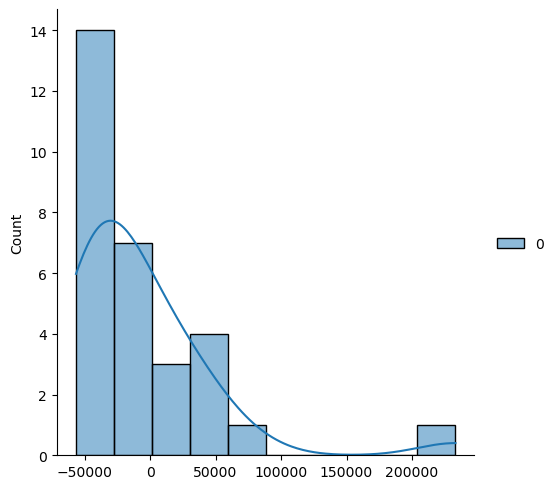

In [120]:
sb.displot(Yact-Ypre,kind="hist",kde=True)
plt.show()

In [121]:
error=mean_absolute_error(Yact,Ypre)
print(error)

39568.946327362275


In [122]:
c=Lr_learner.intercept_
m=Lr_learner.coef_
print("m {} and C {}".format(m,c))

m [[-1742.97125107]] and C [3580125.30974345]


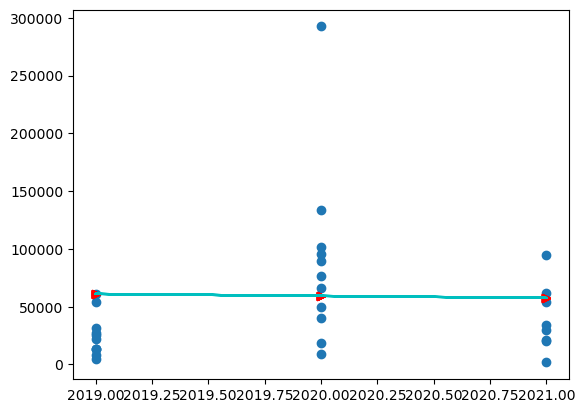

In [124]:
plt.scatter(Xtest,Ytest)
plt.plot(Xtest,Ypre,'r>')
plt.plot(Xtest,Ypre, 'c')
plt.show()

## Part 6 : About the previous Projects

My name is Rishit Muarya and currently I am a 3rd year student , persuing my B.tech form Axis Institute of Technology and Management . As I am a fresher so I ahve worked on several personal projects regarding Machine Learning . Recently I have 
worked on Computer Vision . In which my team has worked on real life problems for face detection. 
In face detection model we collected datasets through platforms like kaggle , cocco and with the use of face detection module of 
python ,also modules like opencv, we detected various test faces. Our model was almost 65 % accurate . 
Secondaly other application of Computer vision , Image Detection . In this project we used processed images as an input to our 
Image Detection model and it tells about the content of the image. This model was almost 62% accurate .
Also we have worked on LSTM stock prediction project , this LSTM refers to Long Short term memory . This  model uses the concept of RNN(Recurrent Neural Network). After providing it with the previous stocks dataset , our model was able to predict the 
stocks.



## Part 7 : Time Management

If I get selected with this full-time internship oppertunity , as I will surely work hard and manage my time so I can be 
of worth to the company. I have to do more night shifts as I am a student .I am a multitasker and this can help me in
perfroming multiple task and finish them in the given perticular dead line .
